EDA (Understand dataset in depth)

KEY INSIGHTS/CONCLUSIONS :
1. DATA CLEANING : Not much datacleaning required , dataset consistent, no duplicates

2. ENERGY CONSUMPTION-SQUARE FOOT have a linear relationship , Linear Regression preferred

3. Building type - Energy Consumption (Max : Industrial)
number of applications used are uniform , in all Building Types but the Average Energy Consumption : highest in Industrial ,
{Commercial  :-   4130.023571}

4. Despite difference in energy consumption, max 'Average temperature ' almost same all 3 building types

5. Day of Week has no impact on Energy Consumption of any of the Building Type

6. Slight rise in Average Temp. in commercial on WeekDays than on Weekends

7. Square Footage have highest relationship with Energy Consumption

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("govindaramsriram/energy-consumption-dataset-linear-regression")

print("Path to dataset files:", path)

100%|██████████| 16.3k/16.3k [00:00<00:00, 20.7MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/govindaramsriram/energy-consumption-dataset-linear-regression/versions/1


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Path to the extracted dataset directory
data_dir = "/root/.cache/kagglehub/datasets/govindaramsriram/energy-consumption-dataset-linear-regression/versions/1"

# List all files in the directory to locate the CSV file
print("Files in directory:", os.listdir(data_dir))


Files in directory: ['train_energy_data.csv', 'test_energy_data.csv']


In [39]:
csv_file = "train_energy_data.csv"  # Replace this with the actual file name
data_path = os.path.join(data_dir, csv_file)
df = pd.read_csv(data_path)

In [40]:
df.sample(6)

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
563,Industrial,9282,17,6,29.31,Weekday,3157.54
661,Commercial,8470,50,46,26.35,Weekday,3761.75
568,Commercial,29757,3,6,11.91,Weekend,3578.29
385,Commercial,45641,41,21,15.87,Weekday,5082.68
988,Industrial,30281,46,12,20.46,Weekend,4611.73
462,Residential,4256,44,9,21.22,Weekday,2276.70


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1000 non-null   object 
 1   Square Footage       1000 non-null   int64  
 2   Number of Occupants  1000 non-null   int64  
 3   Appliances Used      1000 non-null   int64  
 4   Average Temperature  1000 non-null   float64
 5   Day of Week          1000 non-null   object 
 6   Energy Consumption   1000 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 54.8+ KB


In [42]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

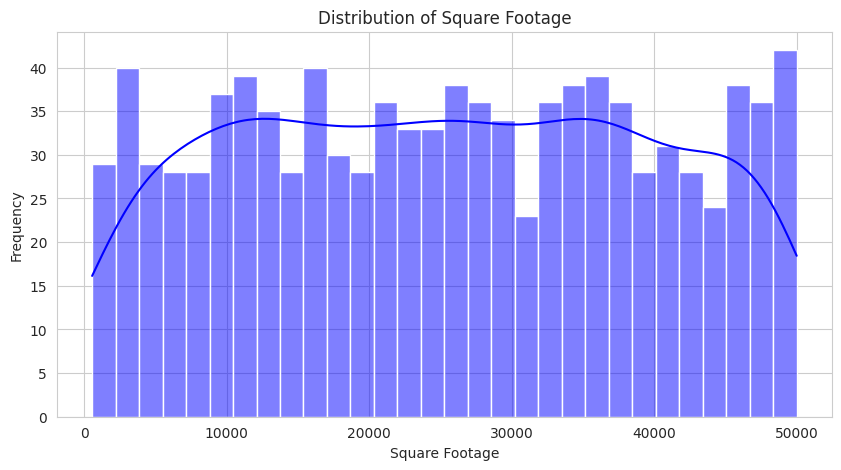

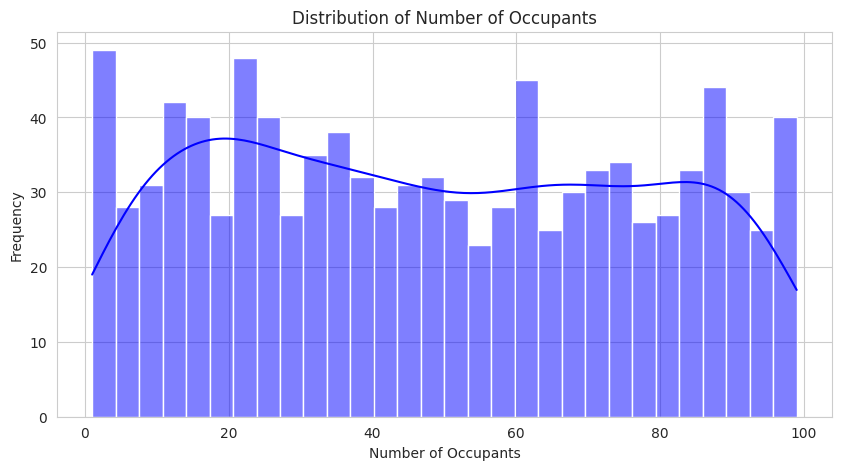

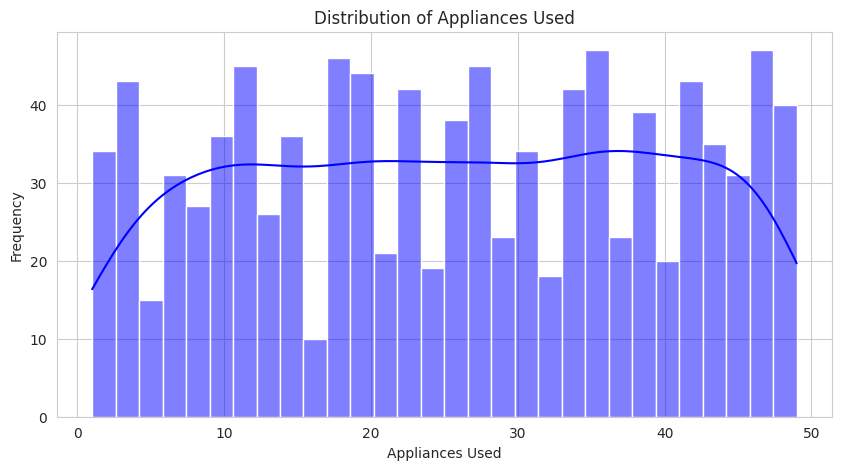

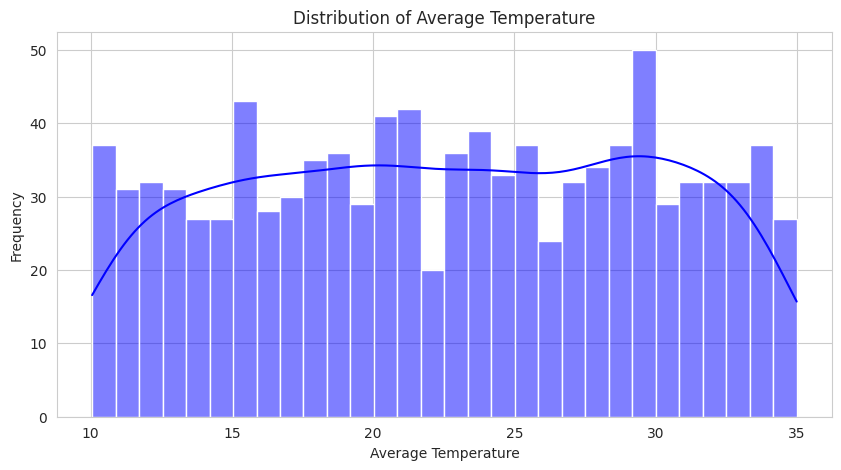

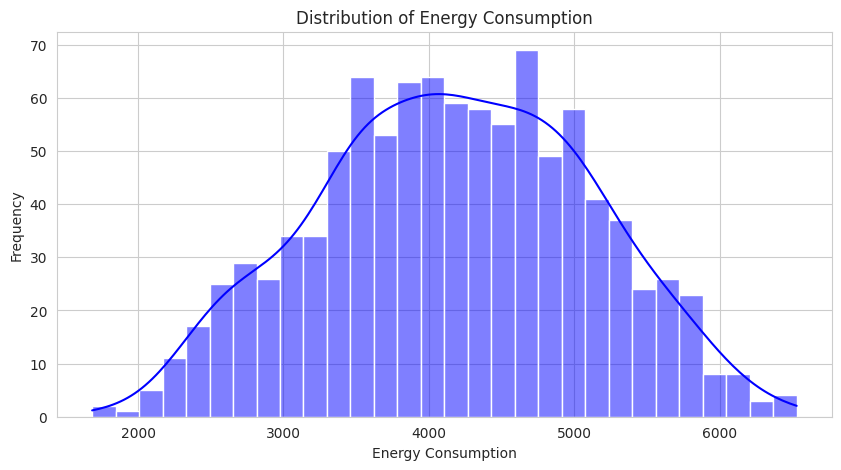

In [43]:
for col in numeric_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True, color='blue', bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [46]:
df.isna().sum()

,0
Building Type,0
Square Footage,0
Number of Occupants,0
Appliances Used,0
Average Temperature,0
Day of Week,0
Energy Consumption,0


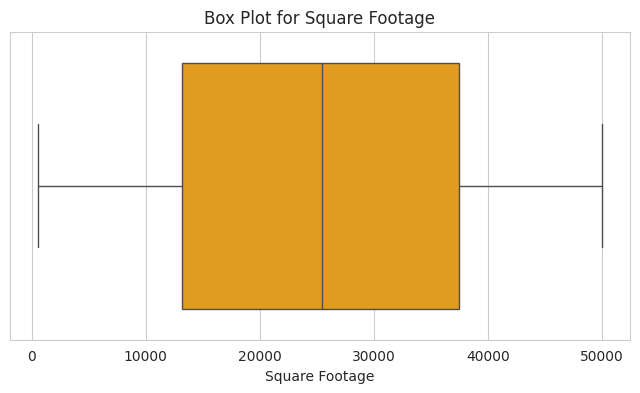

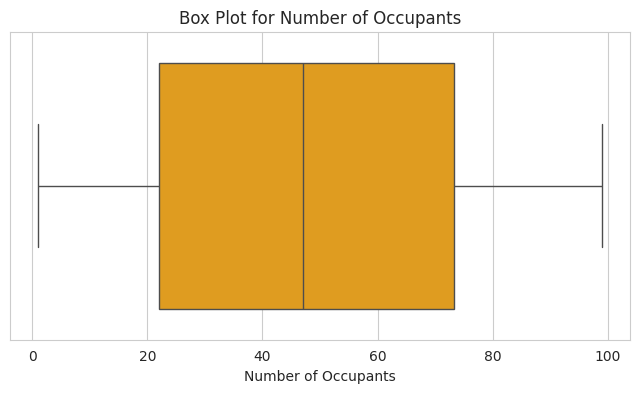

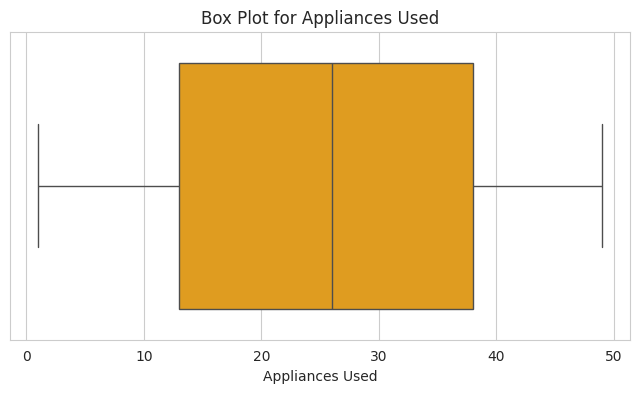

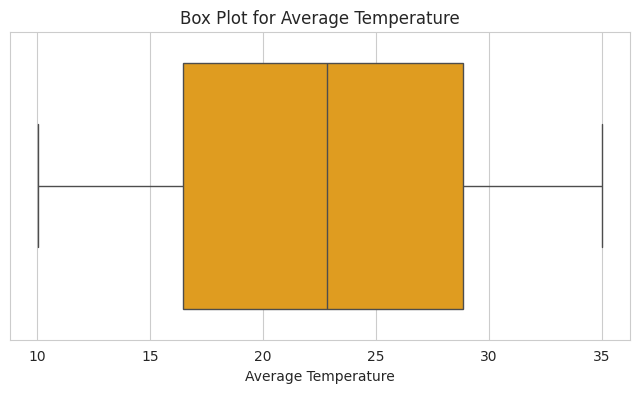

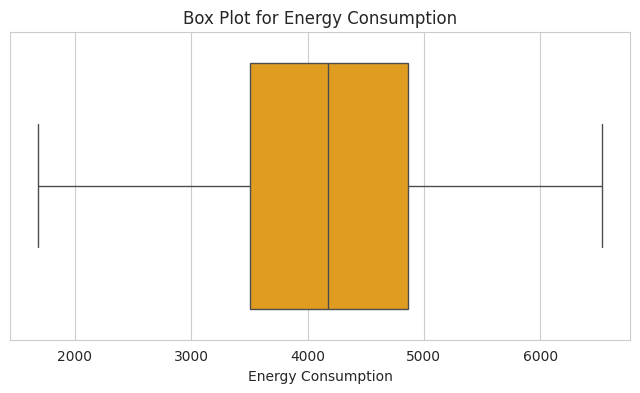

In [47]:
# 4. Box plots for outlier detection
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color='orange')
    plt.title(f'Box Plot for {col}')
    plt.xlabel(col)
    plt.show()

#ENERGY CONSUMPTION VARING (HAVE LARGE RANGE OF OUTLIERS)

In [14]:
df.duplicated().sum()

0

In [15]:
df.columns.to_list()

['Building Type',
 'Square Footage',
 'Number of Occupants',
 'Appliances Used',
 'Average Temperature',
 'Day of Week',
 'Energy Consumption']

<Axes: >

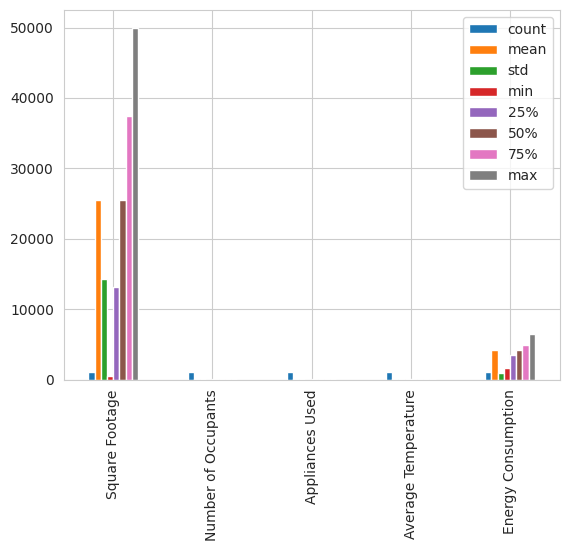

In [48]:
df.describe().T.plot(kind='bar')

<Axes: xlabel='Square Footage', ylabel='Density'>

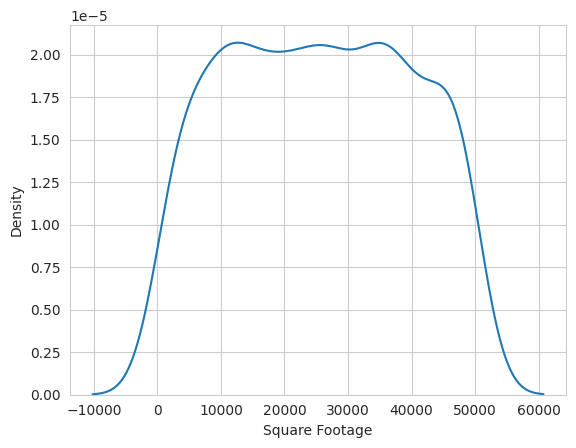

In [49]:
sns.kdeplot(df['Square Footage'])

<Axes: xlabel='Square Footage', ylabel='Energy Consumption'>

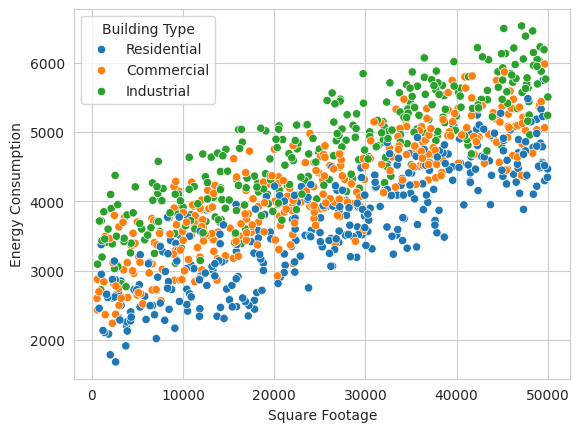

In [50]:
sns.scatterplot(x=df['Square Footage'],y=df['Energy Consumption'],hue=df['Building Type'])

<Axes: xlabel='Appliances Used', ylabel='Energy Consumption'>

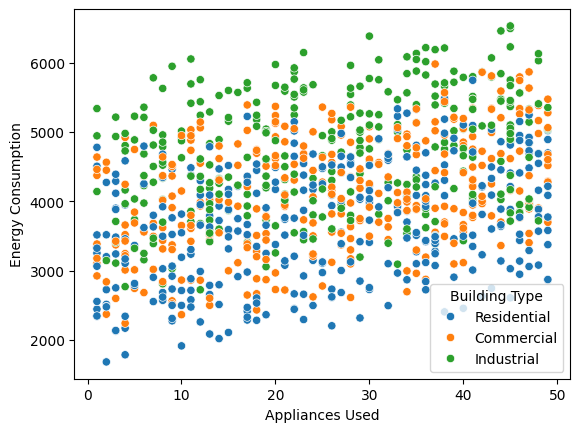

In [20]:
sns.scatterplot(x=df['Appliances Used'],y=df['Energy Consumption'],hue=df['Building Type'])

In [51]:
df["Building Type"]

,Building Type
0,Residential
1,Commercial
2,Industrial
3,Residential
4,Commercial
...,...
995,Residential
996,Industrial
997,Commercial
998,Residential


ANALYSE APPLICATION USED - ENERGY CONSUMPTION , in different building types

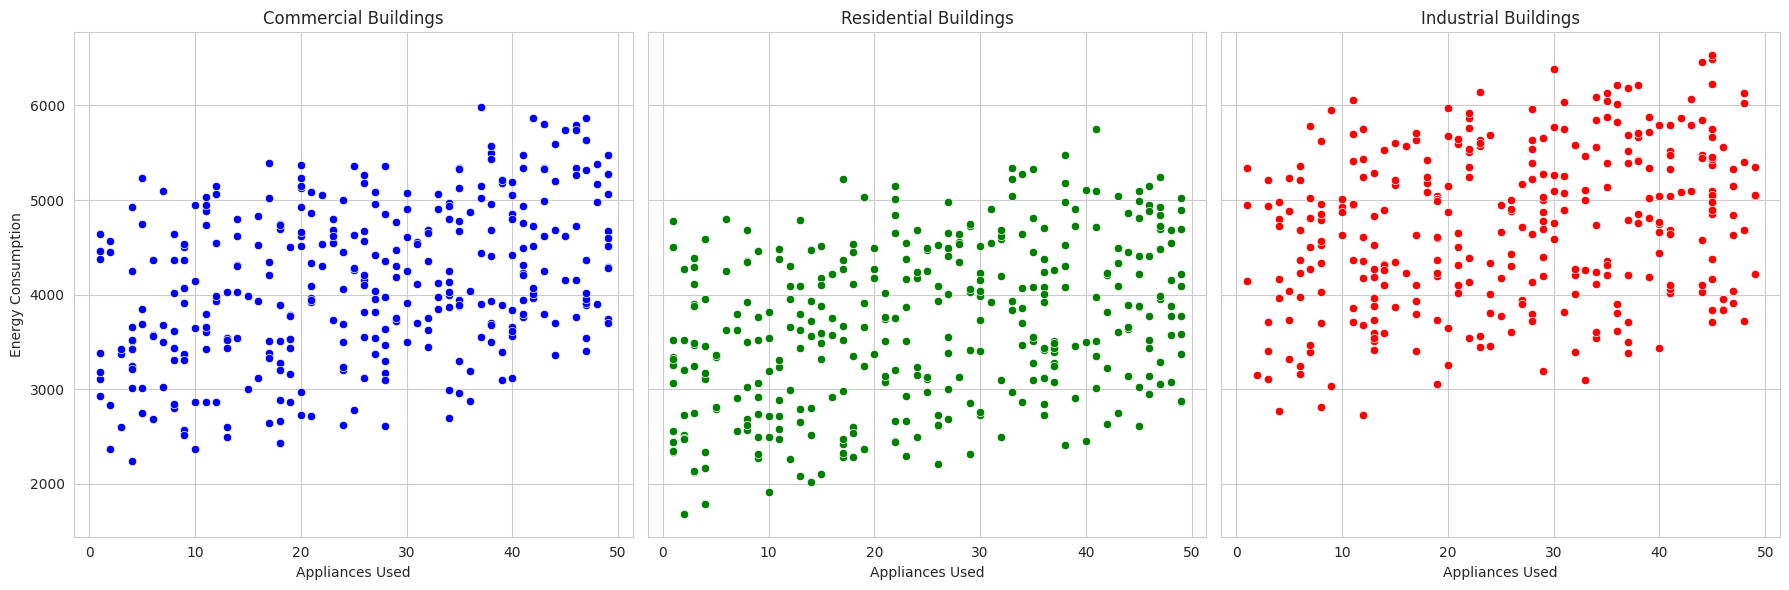

In [52]:
commercial_df = df[df['Building Type'] == 'Commercial']
residential_df = df[df['Building Type'] == 'Residential']
industrial_df = df[df['Building Type'] == 'Industrial']

# Set the style for plots
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Scatterplot for Commercial
sns.scatterplot(ax=axes[0], data=commercial_df, x='Appliances Used', y='Energy Consumption', color='blue')
axes[0].set_title("Commercial Buildings")
axes[0].set_xlabel("Appliances Used")
axes[0].set_ylabel("Energy Consumption")

# Scatterplot for Residential
sns.scatterplot(ax=axes[1], data=residential_df, x='Appliances Used', y='Energy Consumption', color='green')
axes[1].set_title("Residential Buildings")
axes[1].set_xlabel("Appliances Used")
axes[1].set_ylabel("")

# Scatterplot for Industrial
sns.scatterplot(ax=axes[2], data=industrial_df, x='Appliances Used', y='Energy Consumption', color='red')
axes[2].set_title("Industrial Buildings")
axes[2].set_xlabel("Appliances Used")
axes[2].set_ylabel("")

# Adjust layout
plt.tight_layout()
plt.show()

In [53]:
df['Energy Consumption'].max()

6530.6

In [54]:
# Group by 'Building Type' and calculate the mean of 'Energy Consumption'
average_energy_consumption = df.groupby('Building Type')['Energy Consumption'].mean()

# Display the results
print("Average Energy Consumption for each Building Type:")
print(average_energy_consumption)


Average Energy Consumption for each Building Type:
Building Type
Commercial     4130.023571
Industrial     4735.142618
Residential    3681.626628
Name: Energy Consumption, dtype: float64


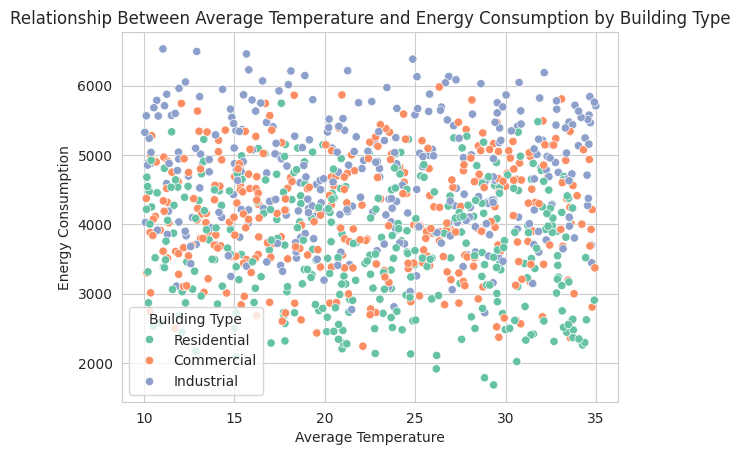

In [55]:
sns.scatterplot(x=df['Average Temperature'],
                y=df['Energy Consumption'],
                hue=df['Building Type'],
                palette='Set2')

# Add plot title and labels
plt.title("Relationship Between Average Temperature and Energy Consumption by Building Type")
plt.xlabel("Average Temperature")
plt.ylabel("Energy Consumption")

# Show the plot
plt.show()

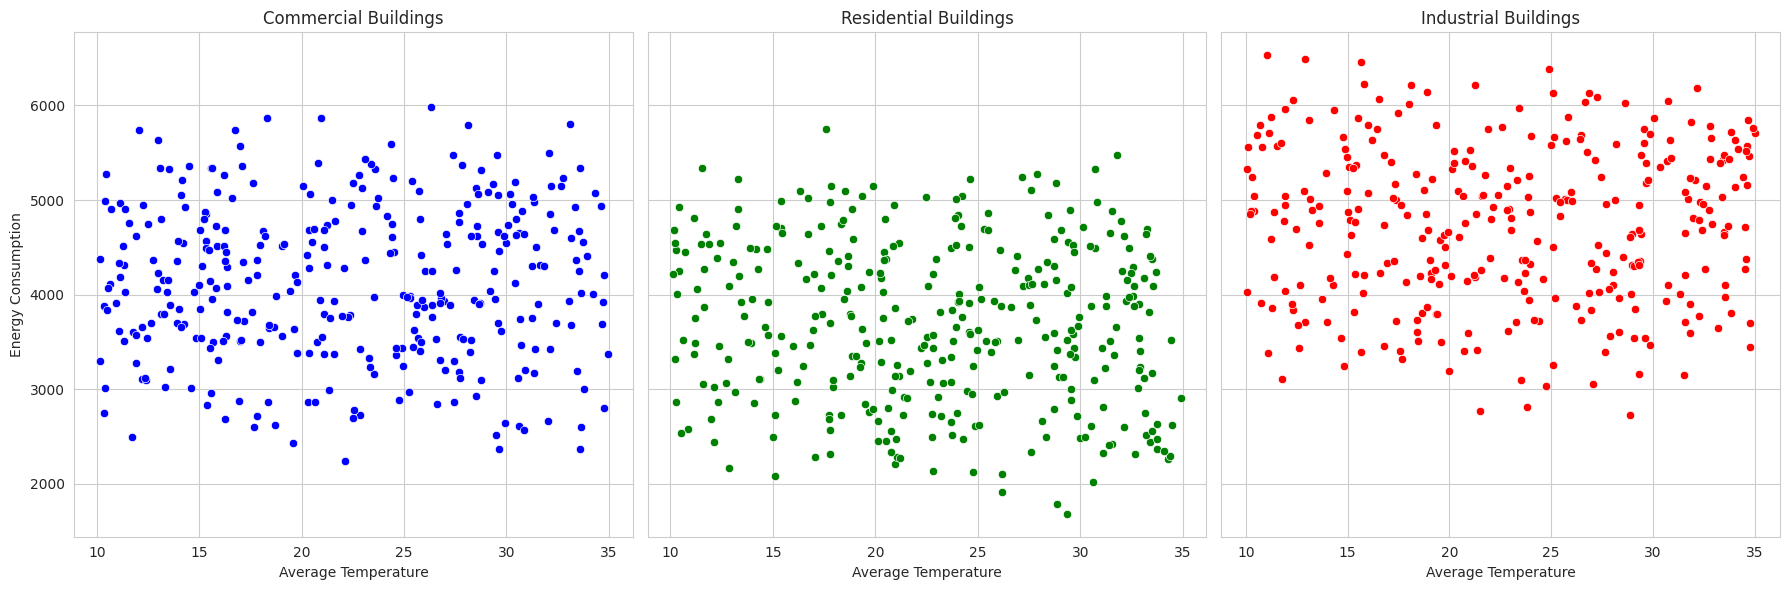

In [57]:
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Scatterplot for Commercial
sns.scatterplot(ax=axes[0], data=commercial_df, x='Average Temperature', y='Energy Consumption', color='blue')
axes[0].set_title("Commercial Buildings")
axes[0].set_xlabel("Average Temperature")
axes[0].set_ylabel("Energy Consumption")

# Scatterplot for Residential
sns.scatterplot(ax=axes[1], data=residential_df, x='Average Temperature', y='Energy Consumption', color='green')
axes[1].set_title("Residential Buildings")
axes[1].set_xlabel("Average Temperature")
axes[1].set_ylabel("")

# Scatterplot for Industrial
sns.scatterplot(ax=axes[2], data=industrial_df, x='Average Temperature', y='Energy Consumption', color='red')
axes[2].set_title("Industrial Buildings")
axes[2].set_xlabel("Average Temperature")
axes[2].set_ylabel("")

# Adjust layout
plt.tight_layout()
plt.show()

In [60]:
print(industrial_df['Average Temperature'].max())
print(commercial_df['Average Temperature'].max())
print(residential_df['Average Temperature'].max())

34.99
34.94
34.91


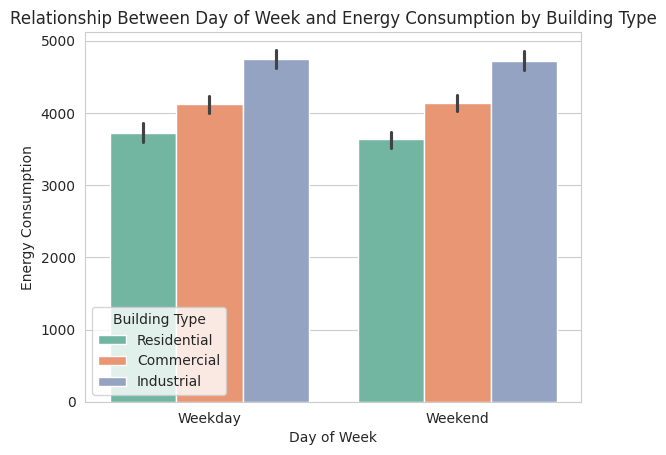

In [62]:

sns.barplot(x=df['Day of Week'],
                y=df['Energy Consumption'],
                hue=df['Building Type'],
                palette='Set2')

# Add plot title and labels
plt.title("Relationship Between Day of Week and Energy Consumption by Building Type")
plt.xlabel("Day of Week")
plt.ylabel("Energy Consumption")

# Show the plot
plt.show()

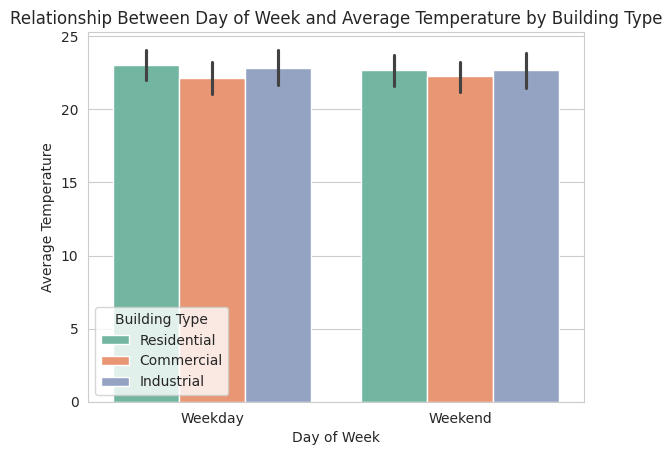

In [63]:
sns.barplot(x=df['Day of Week'],
                y=df['Average Temperature'],
                hue=df['Building Type'],
                palette='Set2')

# Add plot title and labels
plt.title("Relationship Between Day of Week and Average Temperature by Building Type")
plt.xlabel("Day of Week")
plt.ylabel("Average Temperature")

# Show the plot
plt.show()

In [24]:
from sklearn.metrics import mean_squared_error

In [64]:
# Map categorical features to numerical values
building_type_map = {"Residential": 1, "Commercial": 2, "Industrial": 3}
day_of_week_map = {"Weekday": 1, "Weekend": 0}

df["Building Type"] = df["Building Type"].map(building_type_map)
df["Day of Week"] = df["Day of Week"].map(day_of_week_map)


In [65]:
df.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,1,7063,76,10,29.84,1,2713.95
1,2,44372,66,45,16.72,1,5744.99
2,3,19255,37,17,14.30,0,4101.24
3,1,13265,14,41,32.82,1,3009.14
4,2,13375,26,18,11.92,1,3279.17


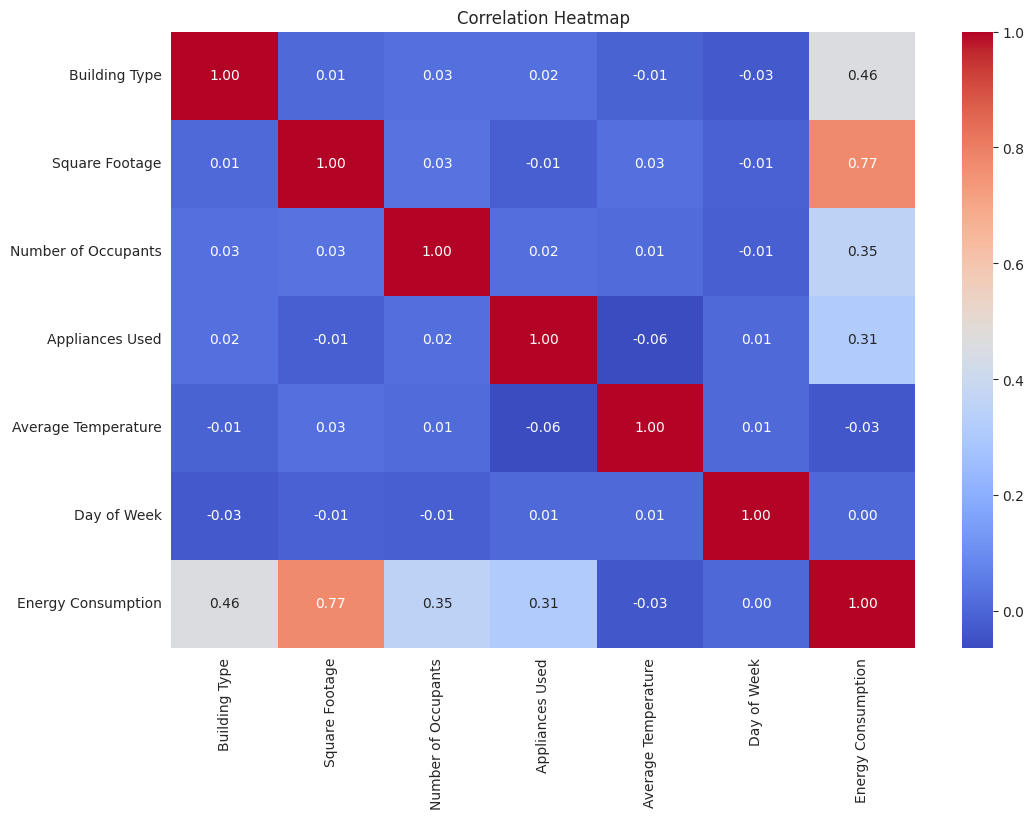

In [66]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap")
plt.show()